In [16]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
# load pima indians dataset
dataset = numpy.loadtxt("datasets/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

In [ ]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
model.metrics_names

In [ ]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

# MNIST Dataset

In [72]:
import keras
from keras.datasets import mnist
(x_train_, y_train), (x_test_, y_test) = mnist.load_data()

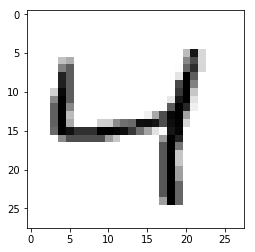

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train_[2], cmap=plt.cm.binary)

In [64]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
print(x_train_.ndim)
print(x_train_.shape)
print(x_test_.ndim)
print(x_test_.shape)

3
(60000, 28, 28)
3
(10000, 28, 28)


In [65]:
x_train_ = x_train_.astype('float32')
x_test_ = x_test_.astype('float32')
x_train_ /= 255
x_test_ /= 255

In [66]:
#linearization
x_train = x_train_.reshape(60000, 784)
x_test = x_test_.reshape(10000, 784)

In [73]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train.dtype

In [74]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [80]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [78]:
x_train.shape, y_train.shape


((60000, 784), (60000, 10))

In [82]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 7.5935 - acc: 0.1711: 2s - loss: 7.1020
Epoch 2/5
60000/60000 [==============================] - 1s 12us/step - loss: 7.7828 - acc: 0.1847: 0s - loss: 7.7219 - acc: 0
Epoch 3/5
60000/60000 [==============================] - 1s 12us/step - loss: 7.7430 - acc: 0.1668
Epoch 4/5
60000/60000 [==============================] - 1s 11us/step - loss: 7.0082 - acc: 0.1043
Epoch 5/5
60000/60000 [==============================] - 1s 12us/step - loss: 7.0506 - acc: 0.0990


In [55]:
history.history['loss']

[0.1914080495884021,
 0.1907114295599361,
 0.18971356357137362,
 0.18925715728352469,
 0.18863690442716083]

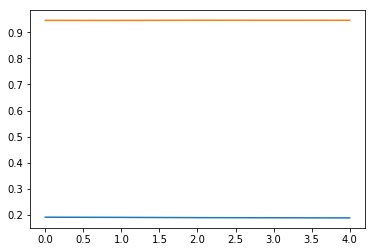

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 18us/step


In [35]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9106


In [36]:
predictions = model.predict(x_test)

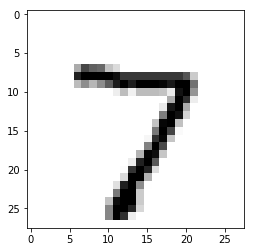

In [42]:
plt.imshow(x_test_[0], cmap=plt.cm.binary)

In [43]:
np.argmax(predictions[0])

7